In [1]:
# Problem 1
''' 
    Train polynomial regression on data in trainPoly.csv using orinary least squares
    for each value of d = 1 through 9. Use the trained model to make and evaluate predictions
    on the data in testPoly.csv
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

poly = PolynomialFeatures(degree=2, include_bias = False)
data = pd.read_csv('/Users/efang/Desktop/coding/Intro-to-ML/CSDS340/data/trainPoly.csv')
X = data.iloc[:, 0].values.reshape(-1, 1)
y = data.iloc[:, 1].values


    

<Figure size 1400x1000 with 0 Axes>

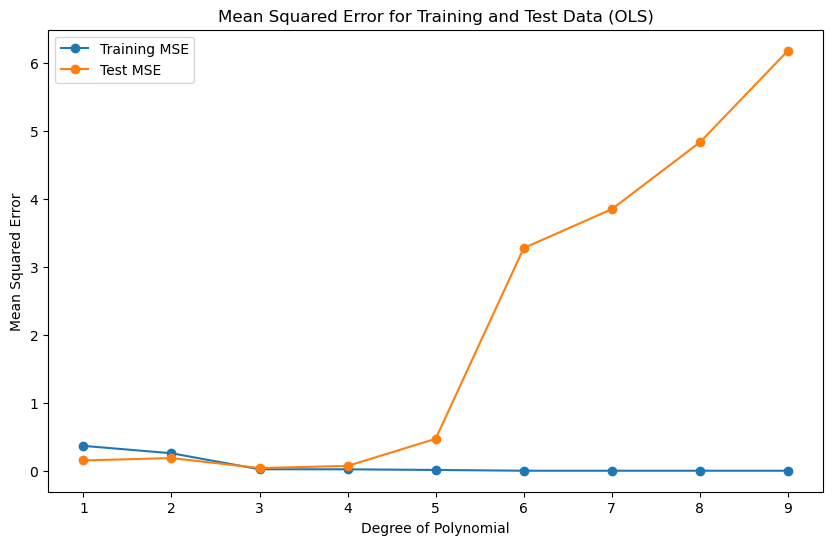

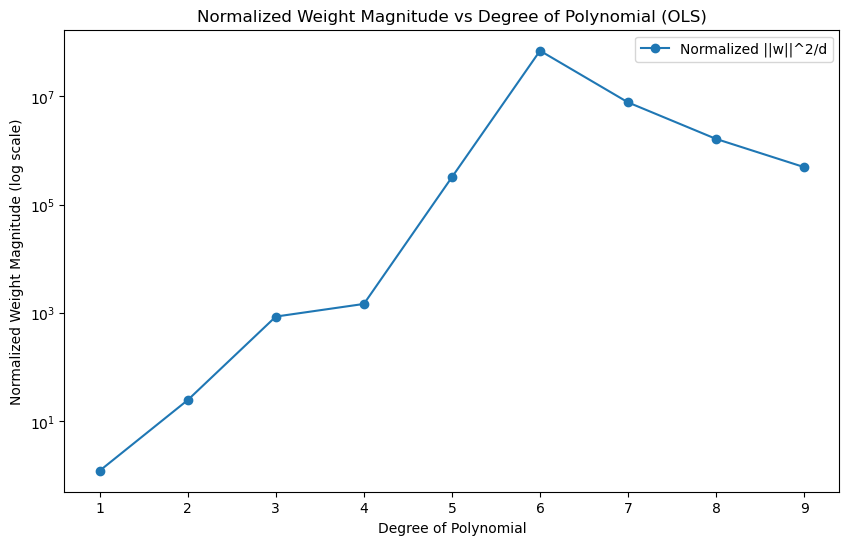

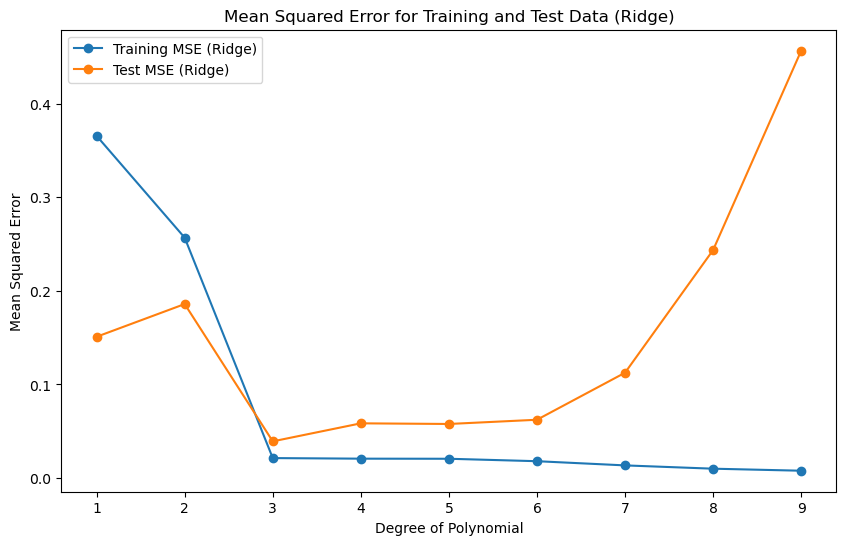

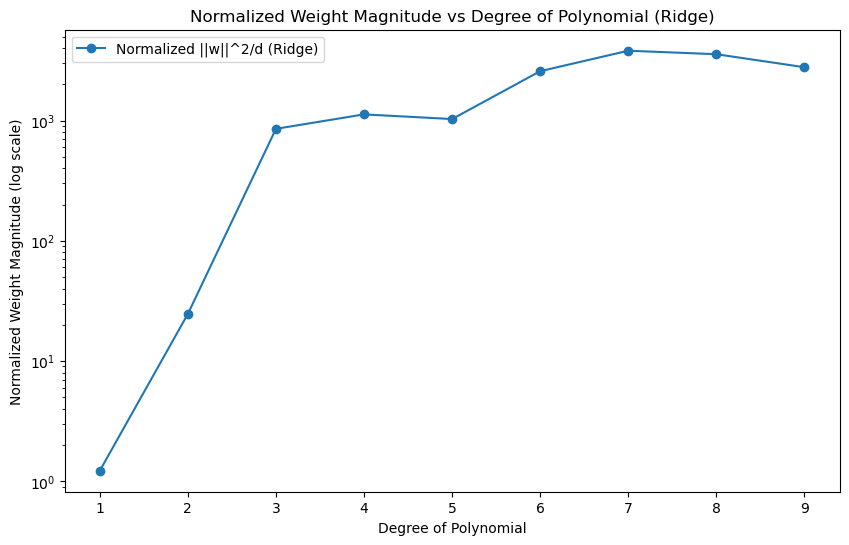

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

training_mse_values = []
test_mse_values = []
weight_magnitudes = []
plt.figure(figsize=(14, 10))

for d in range(1, 10):
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    training_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    training_mse_values.append(training_mse)
    test_mse_values.append(test_mse)
    
    weights = model.coef_[1:]  # exclude the bias term
    weight_magnitude = np.sum(weights**2) / d
    weight_magnitudes.append(weight_magnitude)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), training_mse_values, marker='o', label='Training MSE')
plt.plot(range(1, 10), test_mse_values, marker='o', label='Test MSE')
plt.title('Mean Squared Error for Training and Test Data (OLS)')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), weight_magnitudes, marker='o', label='Normalized ||w||^2/d')
plt.yscale('log')
plt.title('Normalized Weight Magnitude vs Degree of Polynomial (OLS)')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Normalized Weight Magnitude (log scale)')
plt.legend()
plt.show()

# Ridge Regression with alpha = 10^-6
ridge_training_mse_values = []
ridge_test_mse_values = []
ridge_weight_magnitudes = []

for d in range(1, 10):
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    ridge_model = Ridge(alpha=1e-6)
    ridge_model.fit(X_train_poly, y_train)
    
    y_train_pred = ridge_model.predict(X_train_poly)
    y_test_pred = ridge_model.predict(X_test_poly)
    training_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    ridge_training_mse_values.append(training_mse)
    ridge_test_mse_values.append(test_mse)
    
    weights = ridge_model.coef_[1:]  # exclude the bias term
    weight_magnitude = np.sum(weights**2) / d
    ridge_weight_magnitudes.append(weight_magnitude)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), ridge_training_mse_values, marker='o', label='Training MSE (Ridge)')
plt.plot(range(1, 10), ridge_test_mse_values, marker='o', label='Test MSE (Ridge)')
plt.title('Mean Squared Error for Training and Test Data (Ridge)')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), ridge_weight_magnitudes, marker='o', label='Normalized ||w||^2/d (Ridge)')
plt.yscale('log')
plt.title('Normalized Weight Magnitude vs Degree of Polynomial (Ridge)')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Normalized Weight Magnitude (log scale)')
plt.legend()
plt.show()
